##### 1. Load the mpg dataset. Read the documentation for it, and use the data to answer these questions.

In [131]:
from pydataset import data

In [132]:
mpg = data ("mpg")
mpg.info()
mpg.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
manufacturer    234 non-null object
model           234 non-null object
displ           234 non-null float64
year            234 non-null int64
cyl             234 non-null int64
trans           234 non-null object
drv             234 non-null object
cty             234 non-null int64
hwy             234 non-null int64
fl              234 non-null object
class           234 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


##### On average, which manufacturer has the best miles per gallon?

In [133]:
mpg["average_mpg"] = (mpg.cty + mpg.hwy)/2

In [134]:
mpg.groupby("manufacturer").mean().average_mpg.sort_values().tail(1)

manufacturer
honda    28.5
Name: average_mpg, dtype: float64

In [136]:
mpg.groupby("manufacturer").mean().average_mpg.sort_values().tail(1).idxmax()

'honda'

###### How many different manufacturers are there?

In [9]:
len(mpg.manufacturer.unique())

15

###### How many different models are there?

In [10]:
len(mpg.model.unique())

38

In [141]:
mpg.model.nunique()

38

###### Do automatic or manual cars have better miles per gallon?

In [148]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [152]:
car_trans = mpg.groupby("trans").mean()
car_trans

,displ,year,cyl,cty,hwy,average_mpg
trans,,,,,,
auto(av),2.920000,2008.000000,5.200000,20.000000,27.800000,23.900000
auto(l3),2.100000,1999.000000,4.000000,21.000000,27.000000,24.000000
auto(l4),3.715663,2001.277108,6.144578,15.939759,21.963855,18.951807
auto(l5),3.917949,2005.692308,6.564103,14.717949,20.717949,17.717949
auto(l6),4.633333,2008.000000,7.333333,13.666667,20.000000,16.833333
auto(s4),3.433333,2008.000000,5.333333,18.666667,25.666667,22.166667
auto(s5),3.766667,2008.000000,6.000000,17.333333,25.333333,21.333333
auto(s6),3.412500,2008.000000,6.000000,17.375000,25.187500,21.281250
manual(m5),2.732759,2001.482759,5.000000,19.258621,26.293103,22.775862


In [156]:
trans_auto = car_trans.filter(like="auto",axis=0).average_mpg.mean()
trans_auto

20.773042410024715

In [154]:
trans_manual = car_trans.filter(like="manual", axis=0).average_mpg.mean()
trans_manual

21.664246823956443

##### 2. Copy the users and roles dataframes from the examples above. What do you think a right join would look like? An outer join? What happens if you drop the foreign keys from the dataframes and try to merge them?

In [74]:
import pandas as pd
import numpy as np

In [73]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [72]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [88]:
pd.merge(users.rename(columns = {"id":"user_id", "name":"username"}),
         roles.rename(columns = {"name":"role"}), 
         left_on='role_id', right_on='id', how='outer')

,user_id,username,role_id,id,role
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


##### Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

In [177]:
def get_db_url(username,hostname,password,db_name):
    url = f'mysql+pymysql://{username}:{password}@{hostname}/{db_name}'
    return url

from env import host, user, password
url = get_db_url(user,host,password,"employees")

##### Use your function to obtain a connection to the employees database.


In [161]:
pd.read_sql('SELECT * FROM employees LIMIT 5', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


##### Intentionally make a typo in the database url. What kind of error message do you see?

In [162]:
pd.read_sql('SELECT * FROM employees LIMIT 5', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


##### Intentionally make an error in your SQL query. What does the error message look like?


In [163]:
pd.read_sql('SELECT all FROM employees LIMIT 5', url)

ProgrammingError: (pymysql.err.ProgrammingError) (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near 'FROM employees LIMIT 5' at line 1")
[SQL: SELECT all FROM employees LIMIT 5]
(Background on this error at: http://sqlalche.me/e/f405)

##### Read the employees and titles tables into two separate dataframes

In [164]:
df_employees = pd.read_sql('SELECT * FROM employees',url)
df_titles = pd.read_sql('SELECT * FROM titles',url)

##### Visualize the number of employees with each title.

In [165]:
df_titles.groupby("title").count().emp_no

title
Assistant Engineer     15128
Engineer              115003
Manager                   24
Senior Engineer        97750
Senior Staff           92853
Staff                 107391
Technique Leader       15159
Name: emp_no, dtype: int64

##### Join the employees and titles dataframes together.

In [179]:
df_employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [180]:
df_titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [181]:
df_employees_with_titles = pd.merge(df_employees,df_titles, how="inner")
df_employees_with_titles.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


##### Visualize how frequently employees change titles.

In [169]:
df_employees_with_titles.groupby("emp_no").count().title

emp_no
10001     1
10002     1
10003     1
10004     2
10005     2
10006     1
10007     2
10008     1
10009     3
10010     1
10011     1
10012     2
10013     1
10014     1
10015     1
10016     1
10017     2
10018     2
10019     1
10020     1
10021     1
10022     1
10023     1
10024     1
10025     1
10026     2
10027     2
10028     1
10029     2
10030     2
10031     2
10032     2
10033     1
10034     1
10035     2
10036     1
10037     2
10038     2
10039     2
10040     2
10041     2
10042     2
10043     2
10044     1
10045     1
10046     2
10047     2
10048     1
10049     2
10050     2
10051     2
10052     2
10053     1
10054     2
10055     1
10056     2
10057     2
10058     1
10059     1
10060     2
10061     1
10062     2
10063     1
10064     1
10065     1
10066     3
10067     2
10068     2
10069     1
10070     1
10071     1
10072     2
10073     1
10074     1
10075     1
10076     1
10077     1
10078     1
10079     1
10080     2
10081     2
10082     1
10083    

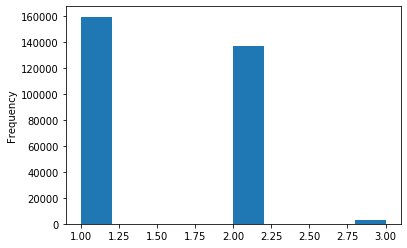

In [160]:
df_employees_with_titles.groupby("emp_no").count().title.plot.hist()

##### For each title, find the hire date of the employee that was hired most recently with that title.

In [174]:
df_employees_with_titles.groupby("title").from_date.max()

title
Assistant Engineer    2000-02-01
Engineer              2002-08-01
Manager               1996-08-30
Senior Engineer       2002-08-01
Senior Staff          2002-08-01
Staff                 2000-02-01
Technique Leader      2000-02-01
Name: from_date, dtype: object

##### Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

In [17]:
df_departments = pd.read_sql('SELECT * FROM departments',url)
df_dept_emp = pd.read_sql('SELECT * FROM dept_emp',url)
df_employees_with_departments = pd.merge(df_departments,df_dept_emp,
                                        left_on="dept_no",right_on="dept_no",how="inner")
df_employees_all = pd.merge(df_employees_with_titles.rename(columns={"from_date":"title_start_date","to_date":"title_to_date"}),
                            df_employees_with_departments.rename(columns={"from_date":"department_start_date","to_date":"department_to_date"}),
                            left_on="emp_no",right_on="emp_no",how="inner")
df_employees_all.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,title_start_date,title_to_date,dept_no,dept_name,department_start_date,department_to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,d005,Development,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,d007,Sales,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,d004,Production,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,d004,Production,1986-12-01,9999-01-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,d004,Production,1986-12-01,9999-01-01


In [65]:
import pandas as pd

query = """
    SELECT *
    FROM employees as e
    JOIN titles as t
    ON t.emp_no = e.emp_no
    JOIN dept_emp as de
    ON de.emp_no = e.emp_no
    JOIN departments as d
    ON d.dept_no = de.dept_no
    WHERE t.to_date = "9999-01-01" AND de.to_date = "9999-01-01"
    """

employees_all = pd.read_sql(query, url)
pd.crosstab(employees_all.title, employees_all.dept_name)

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
title,,,,,,,,,
Assistant Engineer,68,1652,0,0,0,1402,389,77,0
Engineer,627,14040,0,0,0,12081,3405,830,0
Manager,1,1,1,1,1,1,1,1,1
Senior Engineer,1790,38816,0,0,0,33625,9458,2250,0
Senior Staff,11268,1085,9545,9824,11290,1123,0,9092,28797
Staff,3574,315,2891,3073,3551,349,0,2870,8903
Technique Leader,241,5477,0,0,0,4723,1293,321,0


##### Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

In [171]:
url1 = get_db_url(user,host,password,"chipotle")
pd.read_sql('SHOW TABLES', url1)

,Tables_in_chipotle
0,orders


In [173]:
df_chipotle = pd.read_sql('SELECT * FROM orders',url1)
df_chipotle.info()
df_chipotle.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
id                    4622 non-null int64
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    4622 non-null object
item_price            4622 non-null object
dtypes: int64(3), object(3)
memory usage: 216.7+ KB


,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


##### What is the total price for each order?

In [174]:
df_chipotle["item_price_num"] = df_chipotle.item_price.str.replace("$","").astype("float64")
df_chipotle.groupby("order_id").item_price_num.sum()

order_id
1        11.56
2        16.98
3        12.67
4        21.00
5        13.70
6        17.50
7        15.70
8        10.88
9        10.67
10       13.20
11       12.38
12       14.37
13       10.88
14       10.08
15       10.88
16       10.68
17       10.08
18       24.90
19       13.90
20       36.20
21       23.36
22       12.98
23       11.17
24       12.07
25       11.38
26       20.50
27       13.90
28       33.70
29       17.98
30       23.36
31       10.68
32       12.98
33       13.20
34       28.40
35       13.40
36       18.00
37       18.00
38       18.57
39       12.20
40       32.75
41       16.20
42       13.70
43       20.50
44       13.20
45       21.97
46       11.88
47       10.08
48       13.70
49       16.15
50       10.88
51       18.57
52       12.98
53       22.45
54       15.70
55       10.08
56       16.65
57       16.20
58       10.88
59       10.98
60       22.50
61       16.20
62       15.70
63       15.70
64       22.50
65       25.45
66       11.48
6

##### What are the most popular 3 items?

In [175]:
# df_chipotle.groupby("item_name").count().sort_values(by="id",ascending=False).head(3)
df_chipotle.groupby("item_name").sum().sort_values(by="quantity",ascending=False).head(3)

,id,order_id,quantity,item_price_num
item_name,,,,
Chicken Bowl,1780635,713926,761,7342.73
Chicken Burrito,1238770,497303,591,5575.82
Chips and Guacamole,1122252,449959,506,2201.04


##### Which item has produced the most revenue?

In [176]:
df_chipotle["profit"] = df_chipotle.quantity * df_chipotle.item_price_num
df_chipotle.groupby("item_name").sum().sort_values(by="profit",ascending=False).head(1).profit

item_name
Chicken Bowl    8044.63
Name: profit, dtype: float64